<a href="https://colab.research.google.com/github/varshitthhh/CE23B050PROJECTS/blob/main/eathquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [3]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [4]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0
3,-59.076,-23.557,15.0,5.8,-157093817.0
4,11.938,126.427,15.0,5.8,-157026430.0


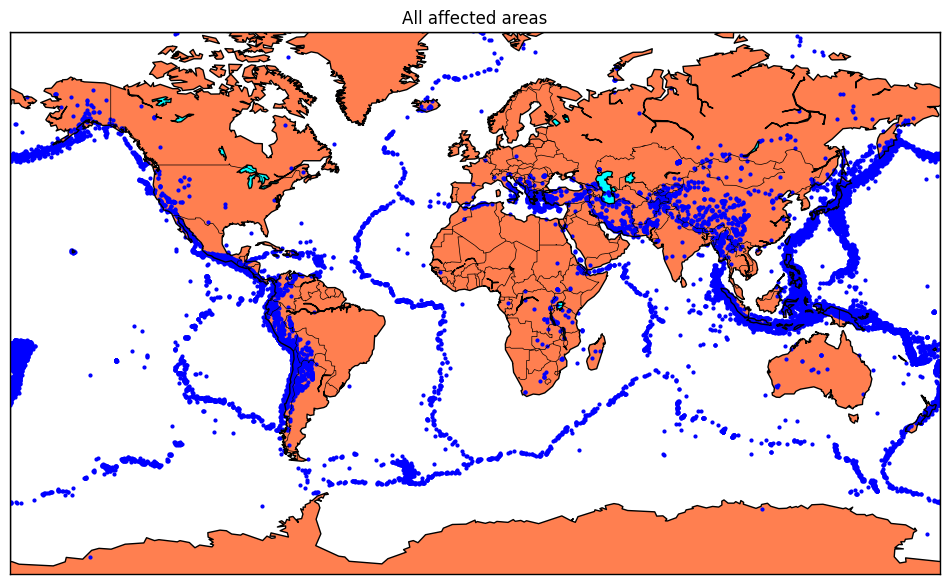

In [5]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [6]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=16, activation='relu', optimizer='adam', loss='sparse_categorical_crossentropy' ):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [17]:
model = KerasClassifier(model=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [19]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print(model.get_params().keys())

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=sigmoid)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Loading data...
Original data shape: (23412, 21)
Columns: ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']
Data after column selection: (23412, 6)
         Date      Time  Latitude  Longitude  Depth  Magnitude
0  01/02/1965  13:44:18    19.246    145.616  131.6        6.0
1  01/04/1965  11:29:49     1.863    127.352   80.0        5.8
2  01/05/1965  18:05:58   -20.579   -173.972   20.0        6.2
3  01/08/1965  18:49:43   -59.076    -23.557   15.0        5.8
4  01/09/1965  13:32:50    11.938    126.427   15.0        5.8

Converting timestamps...
Data after cleaning: (23409, 5)
   Latitude  Longitude  Depth  Magnitude    Timestamp
0    19.246    145.616  131.6        6.0 -157630542.0
1     1.863    127.352   80.0    

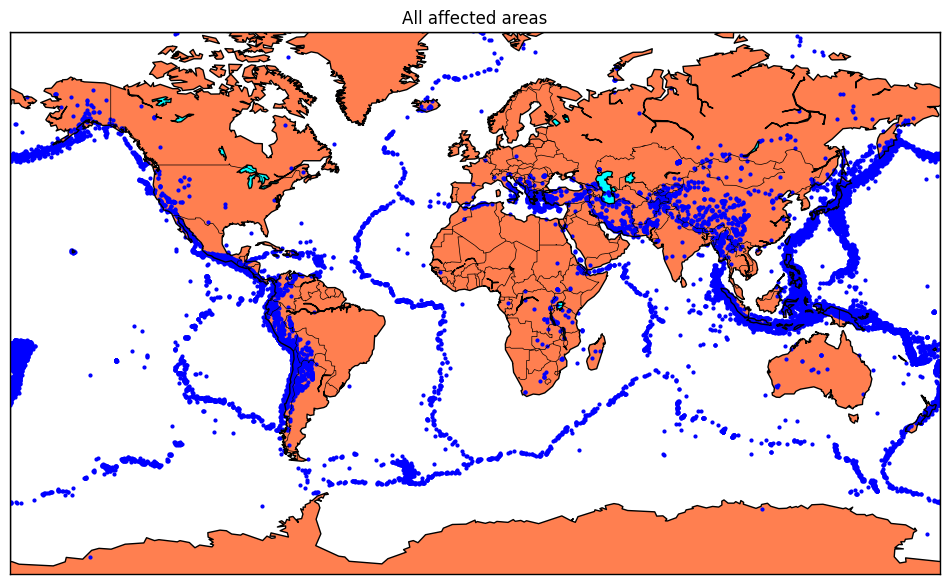


Preparing features and targets...
Features shape: (23409, 3)
Targets shape: (23409, 2)
Training shapes: X_train=(18727, 3), y_train=(18727, 2)
Testing shapes: X_test=(4682, 3), y_test=(4682, 2)

Building neural network model...
Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,914 (42.63 KB)

 Trainable params: 10,914 (42.63 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9793 - mae: 0.6489 - val_loss: 0.9661 - val_mae: 0.6412
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9453 - mae: 0.6443 - val_loss: 0.9556 - val_mae: 0.6414
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9348 - mae: 0.6385 - val_loss: 0.9507 - val_mae: 0.6401
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9264 - mae: 0.6363 - val_loss: 0.9424 - val_mae: 0.6430
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9357 - mae: 0.6403 - val_loss: 0.9354 - val_mae: 0.6344
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9006 - mae: 0.6289 - val_loss: 0.9339 - val_mae: 0.6259
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9351 - mae: 0.6378 - val_loss: 0.9252 - val_mae: 0.6214
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9082 - mae: 0.6273 - val_loss: 0.9314 - val_mae: 0.6249
Epoch 9/50
586/586 ━━━━━━━━━━━━━━━━━━

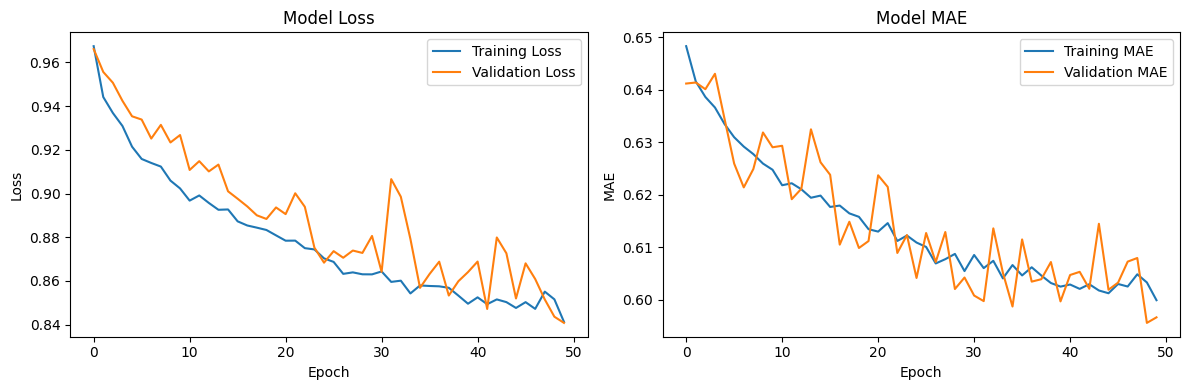

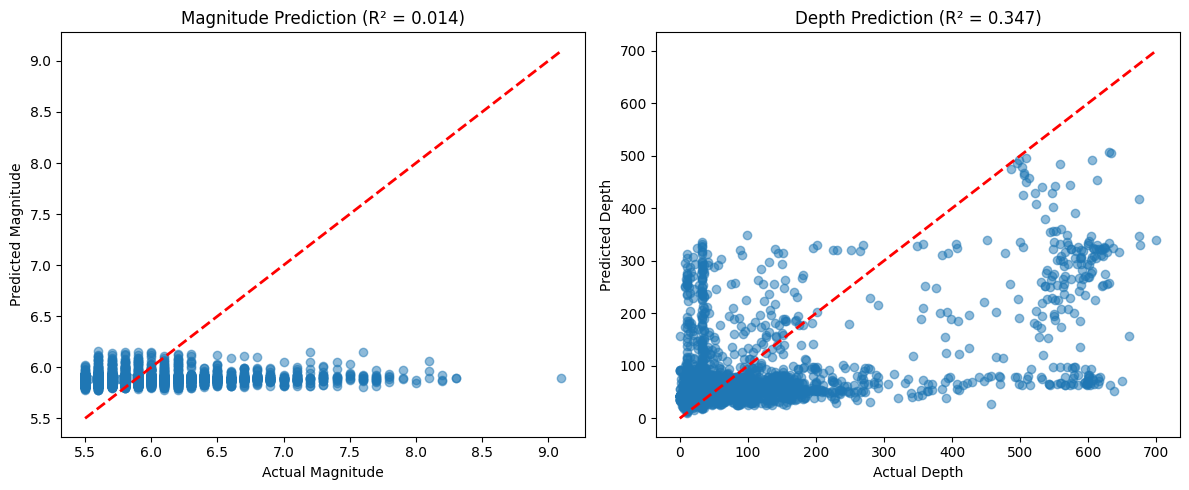


Model training completed!


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
print("Loading data...")
data = pd.read_csv("/content/database.csv")
print(f"Original data shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")

# Select relevant columns
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
print(f"Data after column selection: {data.shape}")
print(data.head())

# Convert Date and Time to timestamp
print("\nConverting timestamps...")
timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append(np.nan)  # Use NaN instead of string

# Add timestamp column
data['Timestamp'] = timestamp

# Drop rows with invalid timestamps and original date/time columns
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data.dropna()  # Remove rows with NaN timestamps
print(f"Data after cleaning: {final_data.shape}")
print(final_data.head())

# Visualization (optional - requires basemap which might not be available)
try:
    from mpl_toolkits.basemap import Basemap
    print("\nCreating visualization...")

    m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80,
                llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

    longitudes = final_data["Longitude"].tolist()
    latitudes = final_data["Latitude"].tolist()

    x, y = m(longitudes, latitudes)

    fig = plt.figure(figsize=(12, 10))
    plt.title("All affected areas")
    m.plot(x, y, "o", markersize=2, color='blue')
    m.drawcoastlines()
    m.fillcontinents(color='coral', lake_color='aqua')
    m.drawmapboundary()
    m.drawcountries()
    plt.show()

except ImportError:
    print("Basemap not available. Skipping visualization.")
    # Alternative simple plot
    plt.figure(figsize=(12, 8))
    plt.scatter(final_data['Longitude'], final_data['Latitude'],
                c=final_data['Magnitude'], cmap='viridis', alpha=0.6)
    plt.colorbar(label='Magnitude')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Earthquake Locations colored by Magnitude')
    plt.show()

# Prepare features and targets for REGRESSION (not classification)
print("\nPreparing features and targets...")
X = final_data[['Timestamp', 'Latitude', 'Longitude']].values
y = final_data[['Magnitude', 'Depth']].values

print(f"Features shape: {X.shape}")
print(f"Targets shape: {y.shape}")

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print(f"Training shapes: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing shapes: X_test={X_test.shape}, y_test={y_test.shape}")

# Neural Network Model (using TensorFlow/Keras)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    print("\nBuilding neural network model...")

    def create_regression_model(neurons=64, activation='relu', optimizer='adam',
                               learning_rate=0.001, dropout_rate=0.2):
        model = Sequential([
            Dense(neurons, activation=activation, input_shape=(3,)),
            Dropout(dropout_rate),
            Dense(neurons//2, activation=activation),
            Dropout(dropout_rate),
            Dense(neurons//4, activation=activation),
            Dense(2, activation='linear')  # Linear activation for regression
        ])

        if optimizer == 'adam':
            opt = Adam(learning_rate=learning_rate)
        else:
            opt = optimizer

        model.compile(optimizer=opt, loss='mse', metrics=['mae'])
        return model

    # Create and train the model
    model = create_regression_model(neurons=128, activation='relu',
                                   learning_rate=0.001, dropout_rate=0.3)

    print("Model architecture:")
    model.summary()

    # Train the model
    print("\nTraining model...")
    history = model.fit(X_train, y_train,
                       batch_size=32,
                       epochs=50,
                       verbose=1,
                       validation_data=(X_test, y_test),
                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

    # Evaluate the model
    print("\nEvaluating model...")
    train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    print(f"Training - Loss: {train_loss:.4f}, MAE: {train_mae:.4f}")
    print(f"Testing - Loss: {test_loss:.4f}, MAE: {test_mae:.4f}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform predictions to original scale
    y_test_original = scaler_y.inverse_transform(y_test)
    y_pred_original = scaler_y.inverse_transform(y_pred)

    # Calculate metrics for each target
    mag_mse = mean_squared_error(y_test_original[:, 0], y_pred_original[:, 0])
    mag_r2 = r2_score(y_test_original[:, 0], y_pred_original[:, 0])
    depth_mse = mean_squared_error(y_test_original[:, 1], y_pred_original[:, 1])
    depth_r2 = r2_score(y_test_original[:, 1], y_pred_original[:, 1])

    print(f"\nMagnitude Prediction - MSE: {mag_mse:.4f}, R²: {mag_r2:.4f}")
    print(f"Depth Prediction - MSE: {depth_mse:.4f}, R²: {depth_r2:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot predictions vs actual
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test_original[:, 0], y_pred_original[:, 0], alpha=0.5)
    plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()],
             [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'r--', lw=2)
    plt.xlabel('Actual Magnitude')
    plt.ylabel('Predicted Magnitude')
    plt.title(f'Magnitude Prediction (R² = {mag_r2:.3f})')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test_original[:, 1], y_pred_original[:, 1], alpha=0.5)
    plt.plot([y_test_original[:, 1].min(), y_test_original[:, 1].max()],
             [y_test_original[:, 1].min(), y_test_original[:, 1].max()], 'r--', lw=2)
    plt.xlabel('Actual Depth')
    plt.ylabel('Predicted Depth')
    plt.title(f'Depth Prediction (R² = {depth_r2:.3f})')

    plt.tight_layout()
    plt.show()

except ImportError:
    print("TensorFlow not available. Please install TensorFlow to run the neural network model.")
    print("Alternative: Use scikit-learn models")

    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression

    # Random Forest as alternative
    print("Using Random Forest as alternative...")
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    # Calculate metrics
    mag_mse = mean_squared_error(y_test[:, 0], y_pred_rf[:, 0])
    mag_r2 = r2_score(y_test[:, 0], y_pred_rf[:, 0])
    depth_mse = mean_squared_error(y_test[:, 1], y_pred_rf[:, 1])
    depth_r2 = r2_score(y_test[:, 1], y_pred_rf[:, 1])

    print(f"Random Forest Results:")
    print(f"Magnitude - MSE: {mag_mse:.4f}, R²: {mag_r2:.4f}")
    print(f"Depth - MSE: {depth_mse:.4f}, R²: {depth_r2:.4f}")

